# 두 마리의 토끼 잡기<br>
by uramoon@kw.ac.kr (<a href="https://raw.githubusercontent.com/ronreiter/interactive-tutorials/master/LICENSE">Apache 2.0 License</a>)<br>
하나의 인공신경망으로 MNIST와 우리가 그린 그림을 모두 잘 예측하도록 만들어봅시다.<br>
(MNIST 테스트 데이터 정확도 95% 이상 **AND** 우리가 그린 테스트 데이터 정확도 95% 이상)

자료실의 our_mnist.npz 파일을 Colab에 업로드한 후 다음을 진행합니다.<br>
our_mnist.npz 파일은 여러분이 그린 그림으로 만든 데이터셋입니다.

## 우리가 그린 그림 가져오기

In [1]:
import numpy as np

npzfile = np.load('our_mnist.npz')

our_train_images = npzfile['our_train_images']
our_train_labels = npzfile['our_train_labels']
our_test_images = npzfile['our_test_images']
our_test_labels = npzfile['our_test_labels']

## 우리가 그린 훈련 데이터 살펴보기
우리가 그린 훈련 데이터는 [0, 1]로 정규화가 필요 없음을 알 수 있습니다.

In [2]:
print(f'훈련 이미지 모양: {our_train_images.shape}')
print(f'훈련 데이터 값의 범위: [{our_train_images.min()}, {our_train_images.max()}]')
print(f'훈련 레이블 내용: {our_train_labels}')

훈련 이미지 모양: (390, 28, 28, 1)
훈련 데이터 값의 범위: [0.0, 1.0]
훈련 레이블 내용: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]


## TODO1: MNIST 불러와서 [0, 1]로 정규화하기

In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# CNN에서 사용하기 위해 흑백임을 나타내는 차원 추가 (28, 28) -> (28, 28, 1)
# reshape로도 가능
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## 그림 비교해보기
우리가 직접 그린 숫자와 MNIST 데이터셋은 필체가 서로 다르기 때문에 단일 데이터셋으로 학습한 모델의 성능에 한계가 있었음을 확인할 수 있습니다.

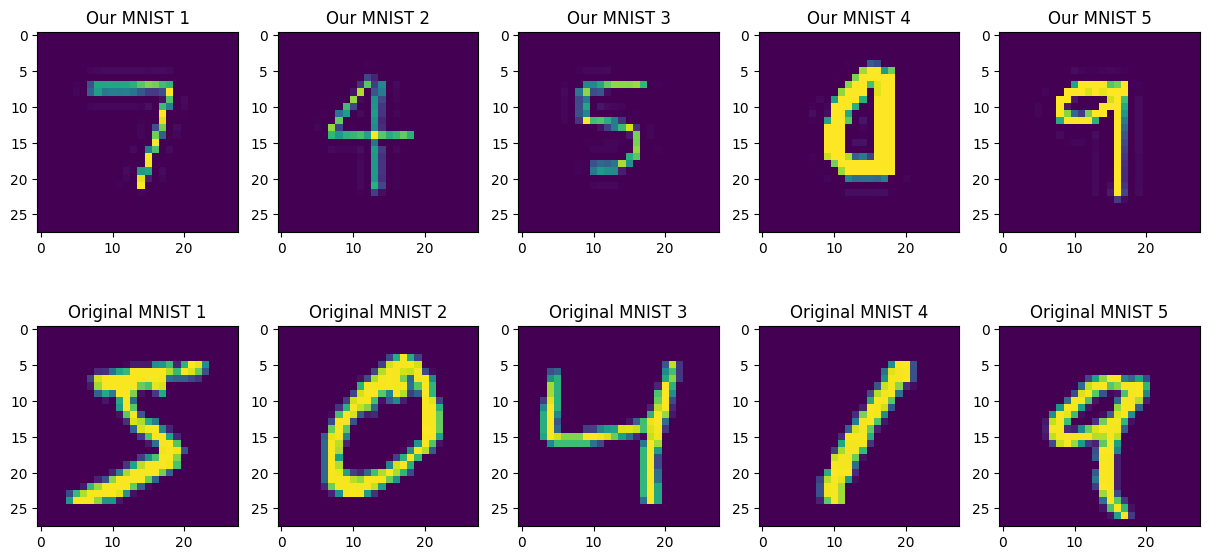

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

plt.figure(figsize=(15, 7))
for i in range(5):
  plt.subplot(2, 5, i + 1)
  plt.imshow(our_train_images[random.randint(0, 389)])
  plt.title(f'Our MNIST {i + 1}')
  plt.subplot(2, 5, i + 6)
  plt.imshow(train_images[i])
  plt.title(f'Original MNIST {i + 1}')
plt.show()

## TODO2: 모델 만들기<br>
자유롭게 하나의 모델을 만들어 MNIST 테스트 데이터셋과 우리의 테스트 데이터셋에서 95% 이상의 정확도를 달성해보세요.<br>

In [13]:
# 모델을 자유롭게 만들어 보세요. (여러 개의 셀 사용 가능)
from keras import models, layers
from keras.optimizers import Adam

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.4))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## TODO3: 나만의 훈련 데이터 만들기

6만장의 MNIST 훈련 데이터와 우리가 그린 390장의 훈련 데이터를 잘 가공하여 나만의 훈련 데이터를 만들어 보세요.<br>
단순하게 둘을 이어붙인다면 우리가 그린 390장은 훈련에서 거의 무시되고 6만장의 MNIST 훈련 데이터 위주로 훈련이 일어납니다.


테스트 데이터 혹은 테스트 데이터를 가공한 데이터셋을 훈련 데이터에 포함하면 안됩니다. **실수하기 쉬우니 조심하세요.**<br>

In [25]:
# TODO: 나만의 훈련 데이터를 자유롭게 만들어 보세요. (증강 등을 위해 여러 개의 코드블록을을 자유로이 사용 가능)
# Hint: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html 사용 가능
# 검증 데이터를 사용할 예정이라면 순서도 섞어 주세요.

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 데이터 증강기 설정
datagen = ImageDataGenerator(
    rotation_range=20,  # 회전 범위
    width_shift_range=0.2,  # 가로 이동 범위
    height_shift_range=0.2,  # 세로 이동 범위
    zoom_range=0.2,  # 확대/축소 범위
    shear_range=0.2,  # 시어 변형
    fill_mode='nearest'  # 빈 픽셀 채우기
)

# 우리가 그린 데이터를 증강하여 MNIST 데이터와 균형 맞추기
augmented_images = []
augmented_labels = []

for i in range(len(our_train_images)):
    img = np.expand_dims(our_train_images[i], axis=0)
    label = our_train_labels[i]
    gen = datagen.flow(img, batch_size=1)
    for _ in range(15):  # 각 이미지당 15개 증강
        aug_img = next(gen)[0]
        augmented_images.append(aug_img)
        augmented_labels.append(label)

# 증강 데이터 numpy 배열로 변환
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# 기존 데이터와 증강 데이터를 합치기
combined_images = np.concatenate((train_images, our_train_images, augmented_images), axis=0)
combined_labels = np.concatenate((train_labels, our_train_labels, augmented_labels), axis=0)

# 데이터 섞기
indices = np.arange(combined_images.shape[0])
np.random.shuffle(indices)

my_train_images = combined_images[indices]
my_train_labels = combined_labels[indices]

## TODO4: 훈련하기
자유롭게 모델을 훈련하여 MNIST 테스트 데이터셋과 우리의 테스트 데이터셋에서 95% 이상의 정확도를 달성해보세요.<br>
다만 테스트 데이터 혹은 테스트 데이터를 가공한 데이터셋으로 훈련하면 안됩니다. **실수하기 쉬우니 조심하세요.**<br>


In [28]:
# 자유롭게 훈련해 보세요.
from sklearn.utils.class_weight import compute_class_weight
from keras.optimizers.schedules import ExponentialDecay

# 학습률 스케줄
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=lr_schedule),
    metrics=["accuracy"]
)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(my_train_labels),
    y=my_train_labels
)
class_weights_dict = dict(enumerate(class_weights))

# 6. 모델 훈련
es = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

model.fit(
    my_train_images, my_train_labels,
    epochs=100,
    batch_size=128,
    validation_split=0.2,
    class_weight=class_weights_dict,
    callbacks=[es]
)

Epoch 1/100
414/414 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9893 - loss: 0.0353 - val_accuracy: 0.9903 - val_loss: 0.0346
Epoch 2/100
414/414 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9898 - loss: 0.0311 - val_accuracy: 0.9915 - val_loss: 0.0293
Epoch 3/100
414/414 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9889 - loss: 0.0337 - val_accuracy: 0.9846 - val_loss: 0.0612
Epoch 4/100
414/414 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9897 - loss: 0.0319 - val_accuracy: 0.9916 - val_loss: 0.0296
Epoch 5/100
414/414 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9889 - loss: 0.0335 - val_accuracy: 0.9918 - val_loss: 0.0304
Epoch 6/100
414/414 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9899 - loss: 0.0318 - val_accuracy: 0.9915 - val_loss: 0.0303
Epoch 7/100
414/414 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9891 - loss: 0.0344 - val_accuracy: 0.9909 - val_loss: 0.0307
Epoch 8/100
414/414 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9903 - loss: 0.0299 - val_acc

## TODO5: MNIST 테스트 데이터로 평가하기

In [29]:
# MNIST 테스트 데이터에서 정확도 95% 이상 달성하기
# 코드 실행만 하면 됩니다.

score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.018577637150883675
Test accuracy: 0.9947999715805054


## TODO6: 우리가 만든 테스트 데이터로 평가하기

In [30]:
# 우리가 만든 테스트 데이터에서도 정확도 95% 이상 달성하기
# 코드 실행만 하면 됩니다.

score = model.evaluate(our_test_images, our_test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02650192193686962
Test accuracy: 0.9846153855323792


동일한 모델로 TODO5와 TODO6에서 정확도 95% 이상 달성해야 합니다.<br>
실패했다면 TODO2부터 검토하여 다시 도전해 보세요.